# Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#assessment">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#results">Results</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [46]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#display visuals in notebook
%matplotlib inline

In [48]:
#set theme for visualisations
sns.set_style('darkgrid')

<a id='wrangling'></a>

## Data Wrangling

### General Properties

In [49]:
# read in the dataset
df_movie = pd.read_csv(r"C:\Users\noama\tmdb-movies.csv")

In [50]:
#visually inspect first 3 rows
df_movie.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [51]:
#display number of columns and rows in the dataset
print("This dataset has " + str(df_movie.shape[0]) + " observations and " + str(df_movie.shape[1]) + " columns")

This dataset has 10866 observations and 21 columns


In [52]:
#display column names, data types and number of missing values
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [53]:
#statistical summary of numerical variables
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Univariate Exploration

C:\Users\noama\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\noama\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\noama\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\noama\anaconda3\lib\site-packages\pandas\plotting\_matpl

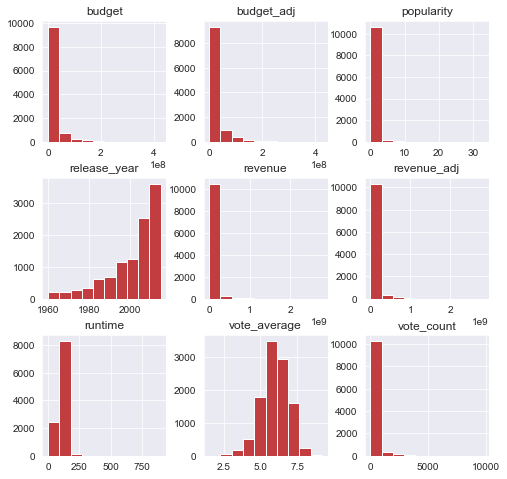

In [54]:
# create histograms for analysis
df_movie.drop(['id'], axis=1).hist(figsize=(8,8));

### Bivariate Exploration

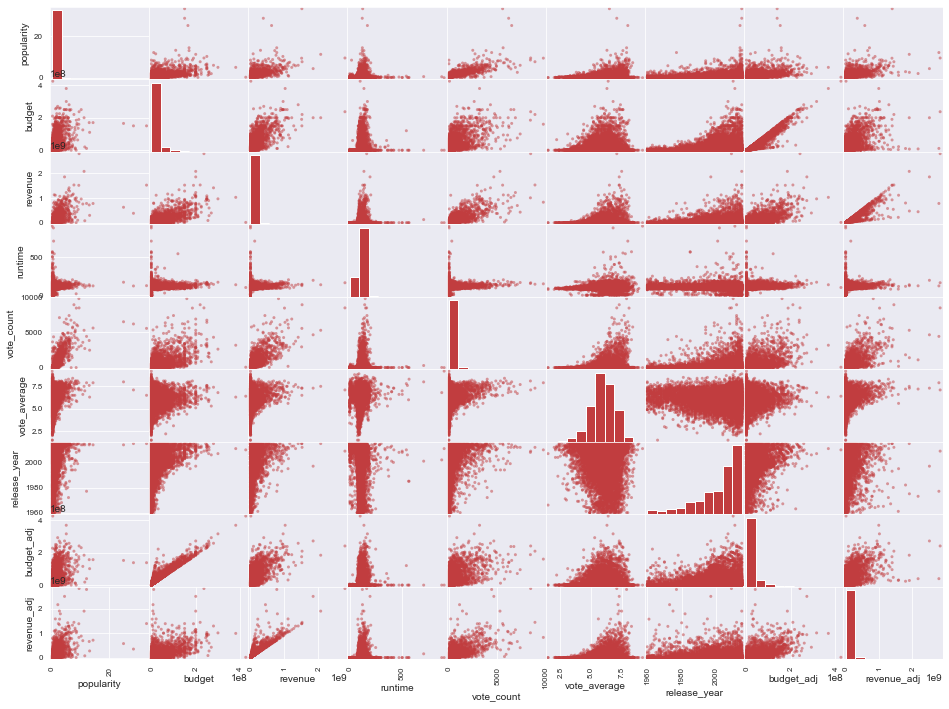

In [55]:
#create scatter plots between each of the variables in the dataset
pd.plotting.scatter_matrix(df_movie.drop(['id'], axis=1), figsize=(16,12));

In [56]:
#calculate correlation matrix 
df_corr = df_movie.drop(['id'], axis=1).corr()

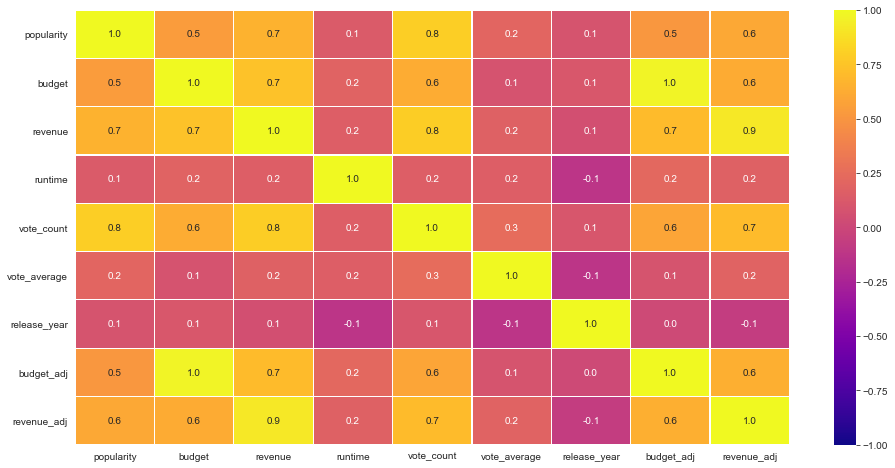

In [57]:
#draw heapmap of correlation matrix
f, ax= plt.subplots(figsize=(16,8))
sns.heatmap(df_corr, annot=True, linewidths=.3, cmap="plasma", fmt='.1f', ax=ax, vmin=-1, vmax=1);

<a id='assessment'></a>

## Data Assessment

### Missing Data

In [58]:
#user defined function to calculate number missing values
def missing_values(df):
    '''
    Function that aggregates missing values values and creates an output table with two columns
    one with the count and the other a percentage of total values for that column.
    '''
    miss_val = df.isnull().sum()
    miss_val_perc = (df.isnull().sum() / len(df)) * 100
    miss_val_table = pd.concat([miss_val, miss_val_perc], axis=1)
    miss_val_table_ren_columns = miss_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    miss_val_table_ren_columns = miss_val_table_ren_columns[miss_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("The selected dataframe has a total of " + str(df.shape[1]) + " columns, of which " + str(miss_val_table_ren_columns.shape[0]) + " contain missing values.")
    return miss_val_table_ren_columns

In [59]:
#apply data to user defined function
missing_values(df_movie)

The selected dataframe has a total of 21 columns, of which 9 contain missing values.


,Missing Values,% of Total Values
homepage,7930,73.0
tagline,2824,26.0
keywords,1493,13.7
production_companies,1030,9.5
cast,76,0.7
director,44,0.4
genres,23,0.2
imdb_id,10,0.1
overview,4,0.0


### Outliers

In [60]:
#calculate number of values recorded as a zero 
(df_movie == 0).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

### Duplicates

In [61]:
#count number of duplicated records
sum(df_movie.duplicated())

1

<a id='cleaning'></a>

## Data Cleaning

In [62]:
# Drop extraneous columns
columns = ['imdb_id', 'homepage', 'tagline', 'overview']
df_movie.drop(columns, axis=1, inplace=True)

In [63]:
#drop the null values in cast, director, genres columns
columns = ['cast', 'director', 'genres']
df_movie.dropna(subset = columns, how='any', inplace=True)

In [64]:
#replace the value 0 with null value label
df_movie['budget'] = df_movie['budget'].replace(0, np.NaN)
df_movie['revenue'] = df_movie['revenue'].replace(0, np.NaN)
df_movie['budget_adj'] = df_movie['budget_adj'].replace(0, np.NaN)
df_movie['revenue_adj'] = df_movie['revenue_adj'].replace(0, np.NaN)

In [65]:
# remove movies with 0 minutes as runtime
df_movie = df_movie.query('runtime != 0')

<a id='results'></a>

## Results

In [66]:
#display number of columns and rows in the dataset
print("This dataset has " + str(df_movie.shape[0]) + " observations and " + str(df_movie.shape[1]) + " columns")

This dataset has 10704 observations and 17 columns


In [67]:
#display column names, data types and number of missing values
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10704 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10704 non-null  int64  
 1   popularity            10704 non-null  float64
 2   budget                5151 non-null   float64
 3   revenue               4844 non-null   float64
 4   original_title        10704 non-null  object 
 5   cast                  10704 non-null  object 
 6   director              10704 non-null  object 
 7   keywords              9294 non-null   object 
 8   runtime               10704 non-null  int64  
 9   genres                10704 non-null  object 
 10  production_companies  9760 non-null   object 
 11  release_date          10704 non-null  object 
 12  vote_count            10704 non-null  int64  
 13  vote_average          10704 non-null  float64
 14  release_year          10704 non-null  int64  
 15  budget_adj         

In [68]:
#statistical summary of numerical variables
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10704.000000,10704.000000,5.151000e+03,4.844000e+03,10704.000000,10704.000000,10704.000000,10704.000000,5.151000e+03,4.844000e+03
mean,64902.866592,0.653813,3.084385e+07,8.932157e+07,102.735893,220.322870,5.966022,2001.236173,3.701358e+07,1.152105e+08
std,91158.001799,1.005641,3.893405e+07,1.621428e+08,30.078104,579.455879,0.930158,12.825600,4.198277e+07,1.989286e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10538.750000,0.211545,6.000000e+06,7.769608e+06,90.000000,17.000000,5.400000,1995.000000,8.233996e+06,1.047632e+07
50%,20235.500000,0.388068,1.750000e+07,3.190530e+07,99.000000,39.000000,6.000000,2006.000000,2.299019e+07,4.402312e+07
75%,73612.500000,0.722425,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000,5.024535e+07,1.317125e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>

## Exploratory Data Analysis

**Question 1: How has the success of genres changed over time (Revenue/Rating)?**

In [69]:
#display genre names
df_movie.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

**Observations:** 

-Some of the columns contain multiple entries delimitted by '|'. Use split function to seperate the rows

In [70]:
#rename orignal dataframe 
df_movie_genre = df_movie

# columns to split by "|"
df_movie_genre['genres'] = df_movie['genres'].apply(lambda x: x.split("|")[0])

In [71]:
# Confirm the action worked and split by genre
df_movie_genre.genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

**Question 1.1: How many movies of a particular genre have been released?**

In [72]:
#count number of releases by year and genre
df_genres_year = df_movie_genre.groupby(['release_year', 'genres']).count()['id'].unstack()
df_genres_year.head(5)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8.0,2.0,NaN,7.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
1961,3.0,2.0,NaN,8.0,NaN,NaN,7.0,NaN,2.0,NaN,NaN,3.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,3.0
1962,5.0,4.0,NaN,2.0,3.0,NaN,11.0,NaN,1.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2.0
1963,3.0,5.0,1.0,9.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,6.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
1964,2.0,5.0,2.0,10.0,5.0,NaN,10.0,NaN,1.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0


In [73]:
#sort number of releases by genre in descending order 
df_movie_genre.groupby(['genres']).count()['id'].sort_values(ascending=False)

genres
Drama              2439
Comedy             2307
Action             1586
Horror              909
Adventure           585
Thriller            489
Documentary         385
Crime               381
Animation           375
Fantasy             270
Science Fiction     211
Romance             182
Family              141
Mystery             125
Music                95
TV Movie             72
War                  58
History              44
Western              42
Foreign               8
Name: id, dtype: int64

[Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 0, 'Genre'),
 Text(0.5, 1.0, 'Number of Movie Releases by Genre')]

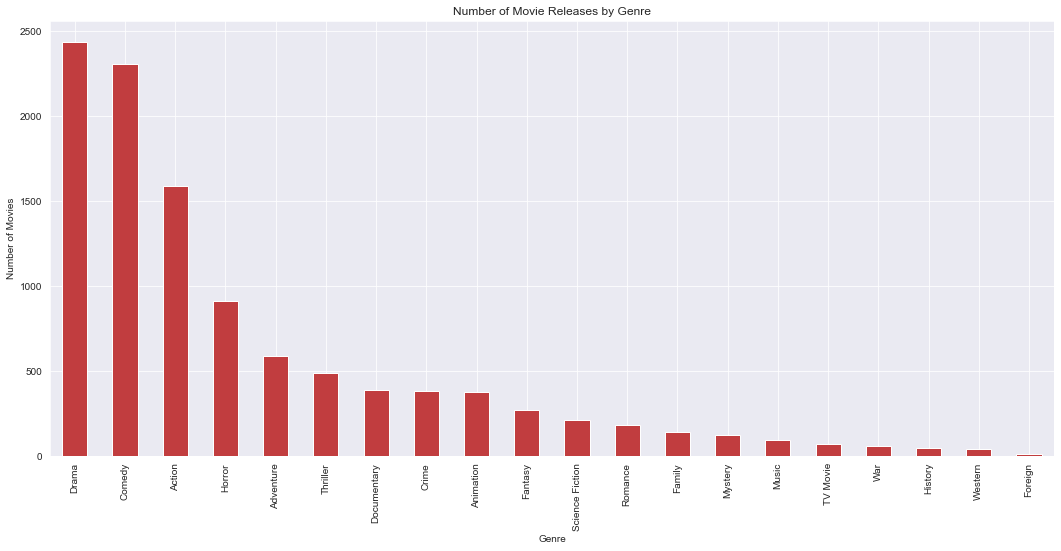

In [74]:
# plot data
fig, ax = plt.subplots(figsize=(18,8))

sns.set_palette("Set1", 20, .65)

# use unstack()
df_movie_genre.groupby(['genres']).count()['id'].sort_values(ascending=False).plot(kind="bar",  ax=ax);
ax.set(xlabel='Genre', ylabel='Number of Movies', title = 'Number of Movie Releases by Genre')

**Observations:**

-Drama is the most frequent genre, followed by comedy and action.

**Question 1.2: How have the fortunes of genres compared over time?**

[Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 0, 'Release Year'),
 Text(0.5, 1.0, 'Movie Release by Genre')]

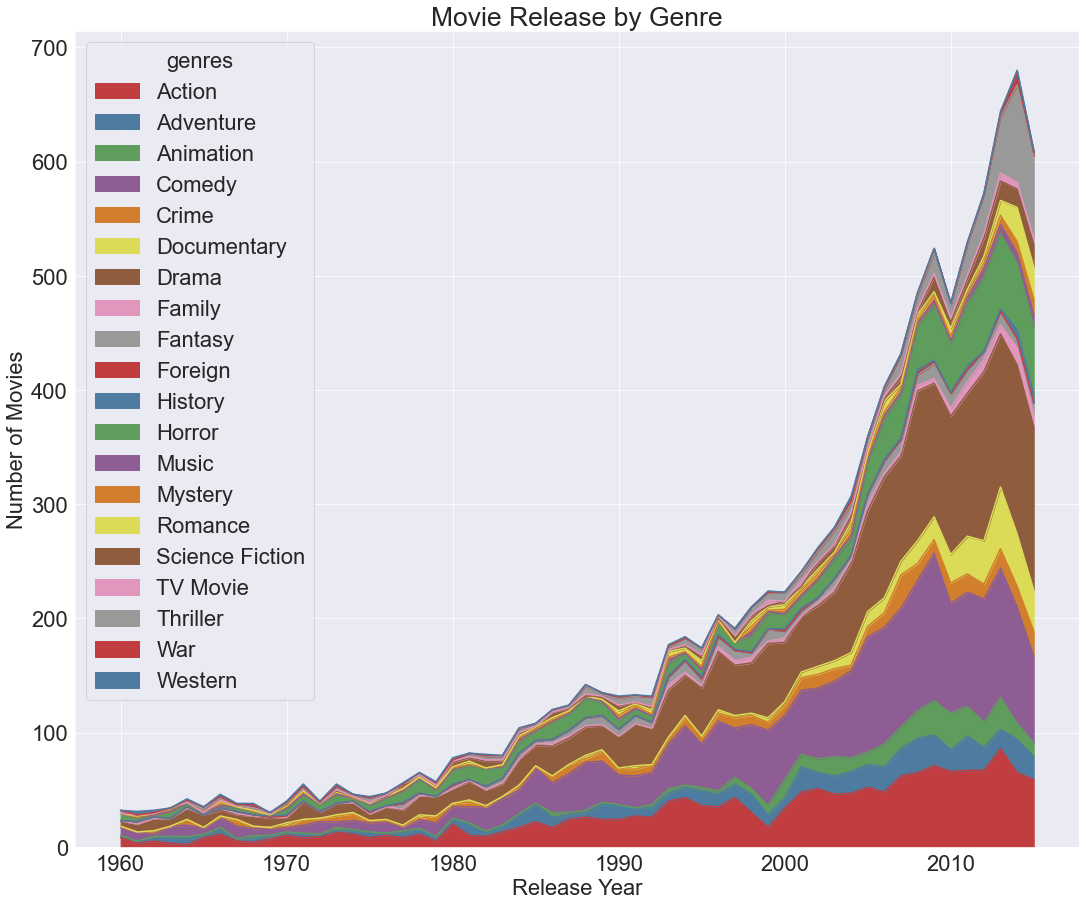

In [75]:
#Set global font size
plt.rcParams.update({'font.size': 22})

# plot data
fig, ax = plt.subplots(figsize=(18,15))

sns.set_palette("Set1", 20, .65)

# use unstack()
df_movie_genre.groupby(['release_year', 'genres']).count()['id'].unstack().plot.area(ax=ax);
ax.set(xlabel='Release Year', ylabel='Number of Movies', title = 'Movie Release by Genre')

**Observations:**

The number of movie releases has generally grown over time. Picking out specific genres, Drama, Thriller, Comedy and Action movies seem to be the predominant themes.

In [76]:
#calculate mean by genre and year
genre_year = df_movie_genre.groupby(['genres', 'release_year']).mean().sort_index()
genre_year.head(5)

id  popularity      budget     revenue  \
genres release_year                                                     
Action 1960           7602.250000    0.590724   7000000.0  32452500.0   
       1961          15514.000000    0.540904   6000000.0  28900000.0   
       1962          24739.000000    0.299207  10000000.0         NaN   
       1963          17721.333333    1.008599   9750000.0  44449382.5   
       1964          18975.500000    0.254216         NaN         NaN   

                     runtime  vote_count  vote_average    budget_adj  \
genres release_year                                                    
Action 1960            137.0   65.875000      6.050000  5.161077e+07   
       1961            147.0   43.333333      6.633333  4.376917e+07   
       1962            123.4   38.000000      6.140000  7.208449e+07   
       1963            127.0  166.666667      6.433333  6.942175e+07   
       1964            128.0   40.000000      6.500000           NaN   

                      revenue_adj  
genres release_year                
Action 1960          2.392712e+08  
       1961          2.108215e+08  
       1962                   NaN  
       1963          3.164876e+08  
       1964                   NaN

Let's plot these into a time series heat map to guage the change over time per genre.

Text(328.90625, 0.5, 'Genre')

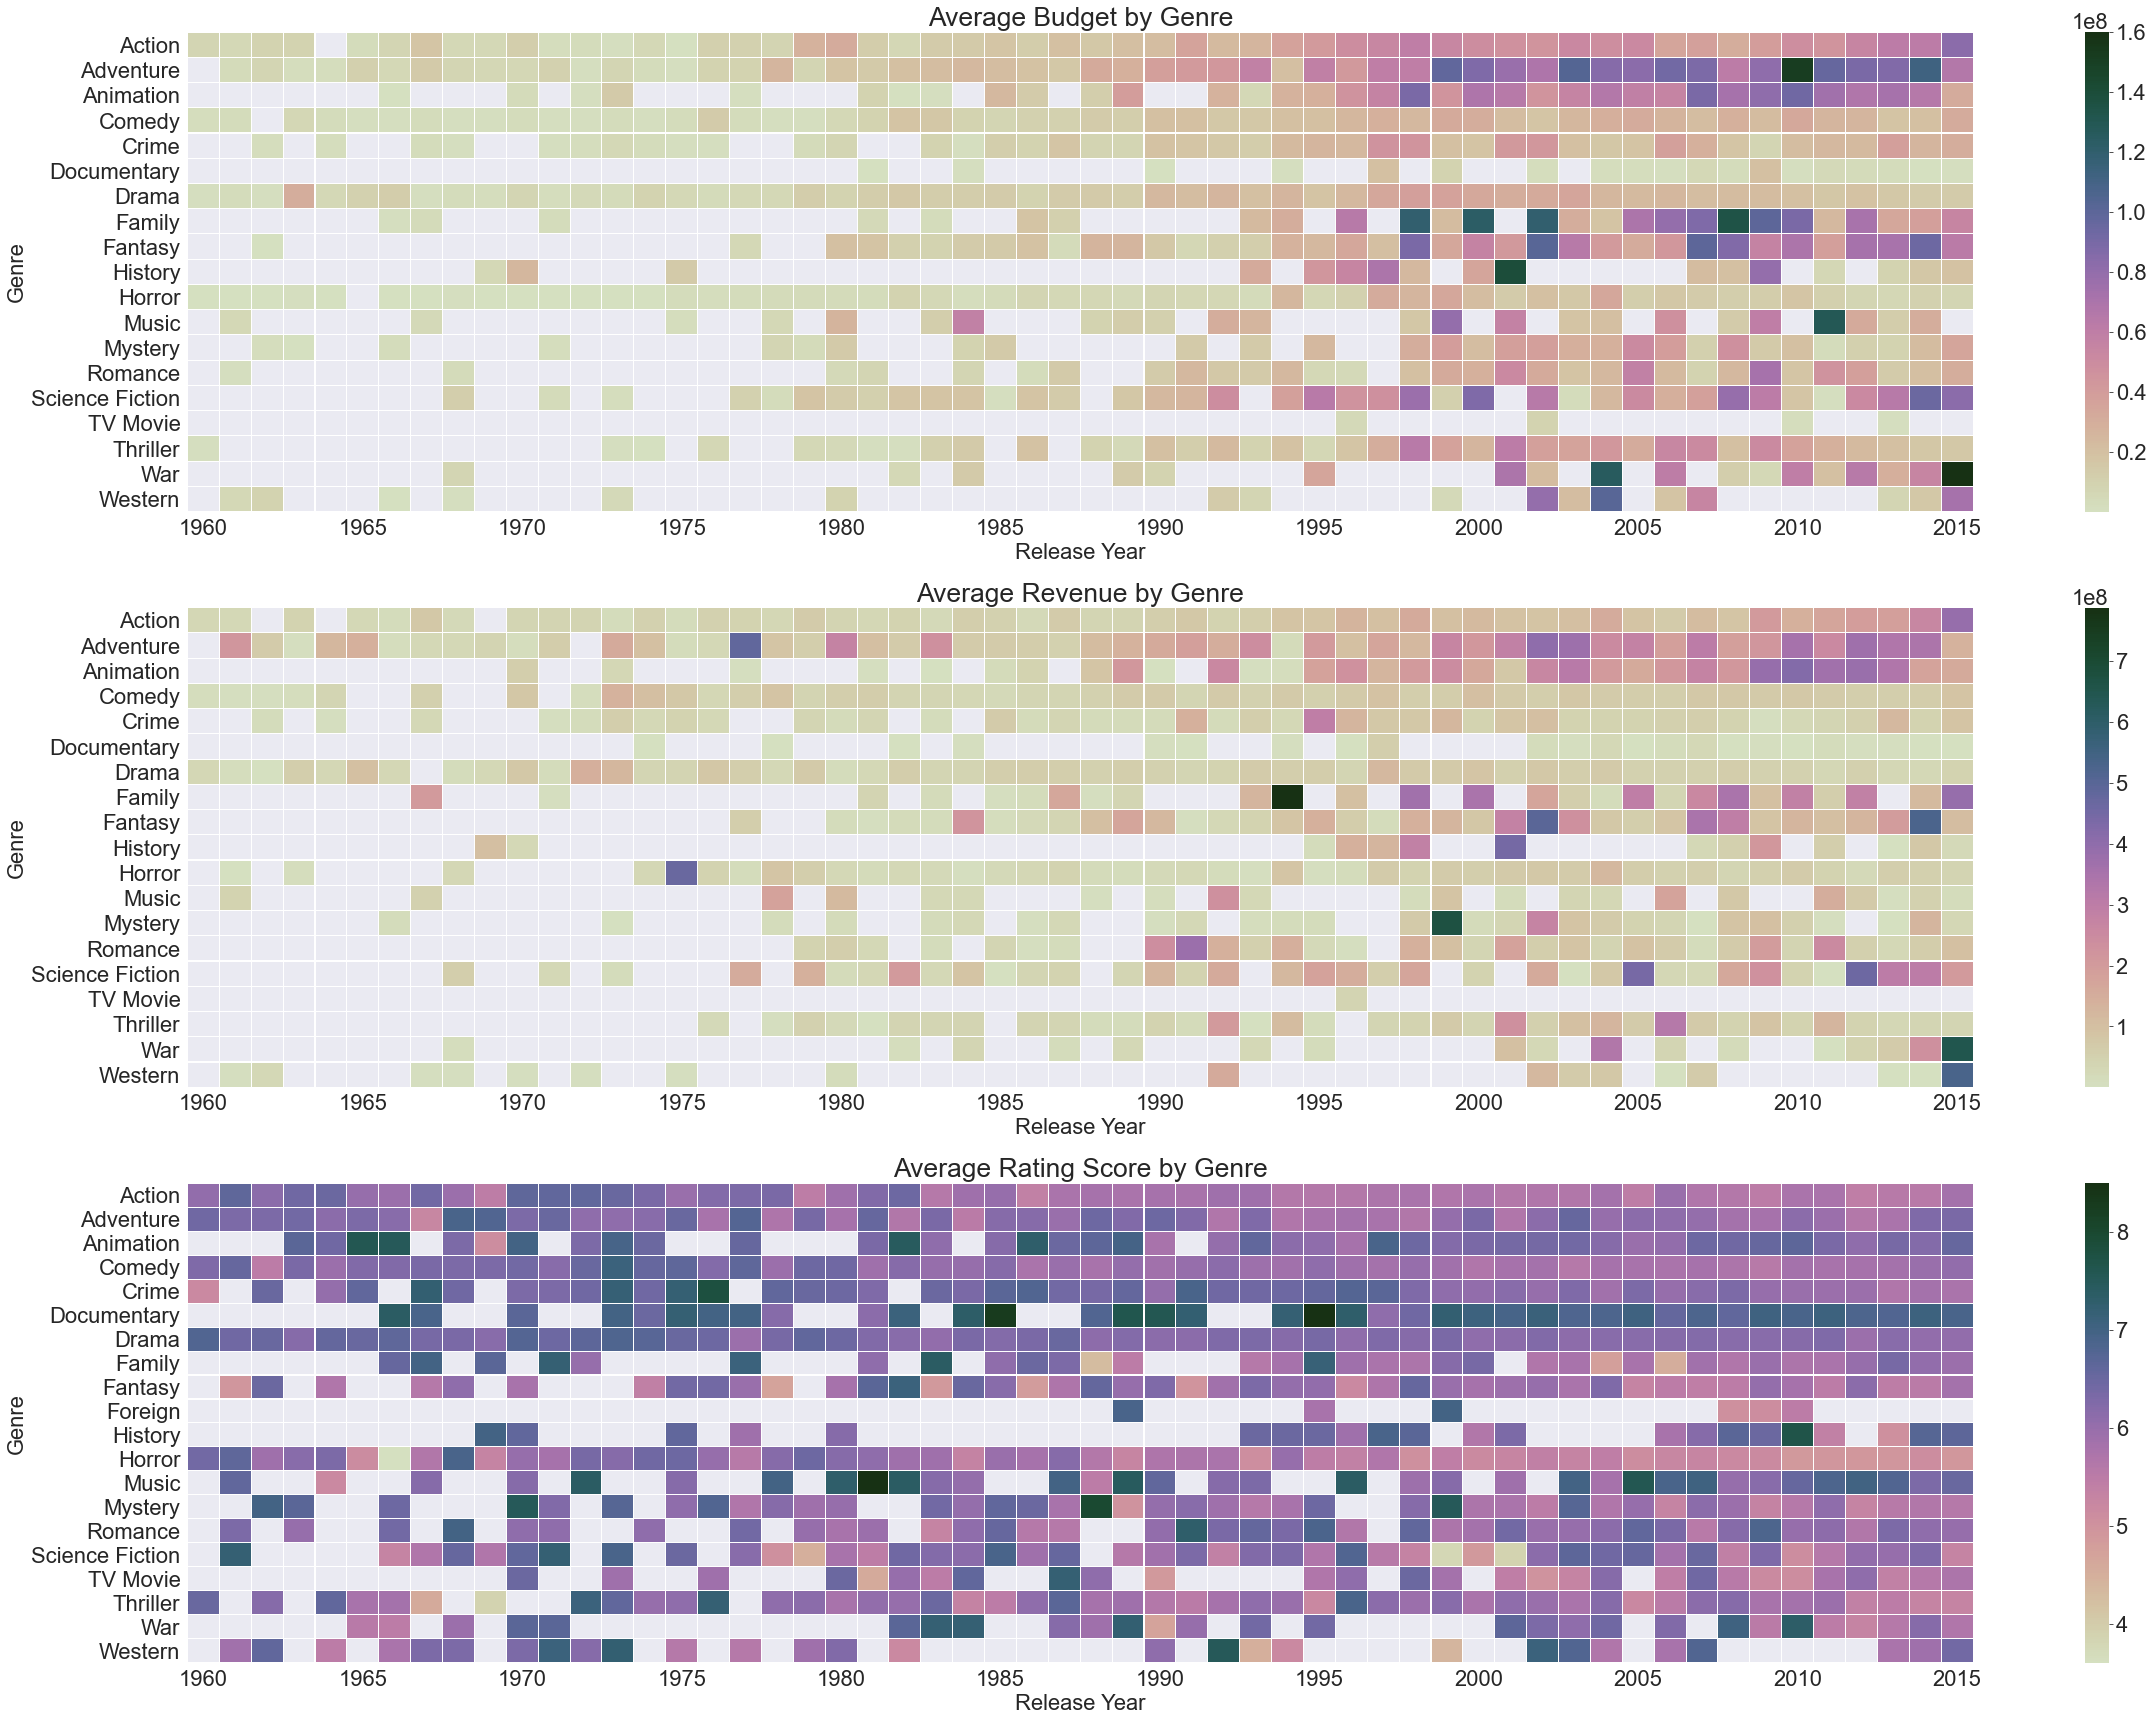

In [77]:
#create multiple heatmaps to display trends over time
df_gyBudget = genre_year.pivot_table(index=['genres'], columns=['release_year'], values='budget', aggfunc=np.mean)
df_gyGross = genre_year.pivot_table(index=['genres'], columns=['release_year'], values='revenue', aggfunc=np.mean)
df_gyVote = genre_year.pivot_table(index=['genres'], columns=['release_year'], values='vote_average', aggfunc=np.mean)
f, [axA, axB, axC] = plt.subplots(figsize=(40, 30), nrows=3)
cmap = sns.cubehelix_palette(start=1.3, rot=1.3, as_cmap=True)
sns.heatmap(df_gyBudget, xticklabels=5, cmap=cmap, linewidths=0.05, ax=axA)
sns.heatmap(df_gyGross, xticklabels=5, cmap=cmap, linewidths=0.05, ax=axB)
sns.heatmap(df_gyVote, xticklabels=5, cmap=cmap, linewidths=0.05, ax=axC)
axA.set_title('Average Budget by Genre')
axB.set_title('Average Revenue by Genre')
axC.set_title('Average Rating Score by Genre')
axA.set_xlabel('Release Year')
axA.set_ylabel('Genre')
axB.set_xlabel('Release Year')
axB.set_ylabel('Genre')
axC.set_xlabel('Release Year')
axC.set_ylabel('Genre')

**Observations:**
Revenues and budgets have generally grown over time. This makes sense as more films are released.

That doesn't necessarily mean average ratings are increasing though. In particular the average ratings of Horror movies has declined over time, while the quality of Dramas has increased.

**Question 2: How succesful are different genres (Revenue/Rating)?**

Success can be measured in two ways; return on investment (ROI) or user rating.

In [78]:
#calculate mean values for selcted measures of interest
df_movie[['genres', 'revenue', 'budget', 'popularity', 'vote_average']].groupby(['genres']).mean()

,revenue,budget,popularity,vote_average
genres,,,,
Action,1.170983e+08,4.231958e+07,0.838266,5.751009
Adventure,2.071020e+08,6.477152e+07,1.219834,6.049744
Animation,2.399754e+08,6.229486e+07,0.853208,6.401867
Comedy,6.471663e+07,2.320338e+07,0.539358,5.880971
Crime,6.138535e+07,2.274751e+07,0.693807,6.214436
Documentary,9.839752e+06,3.690254e+06,0.184708,6.916623
Drama,5.334542e+07,2.149751e+07,0.554855,6.198524
Family,1.807031e+08,5.275776e+07,0.744438,5.941844
Fantasy,1.345879e+08,4.588527e+07,0.864781,5.789630


**Question 2.1: Which genres have the largest revenue and largest budgets?**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

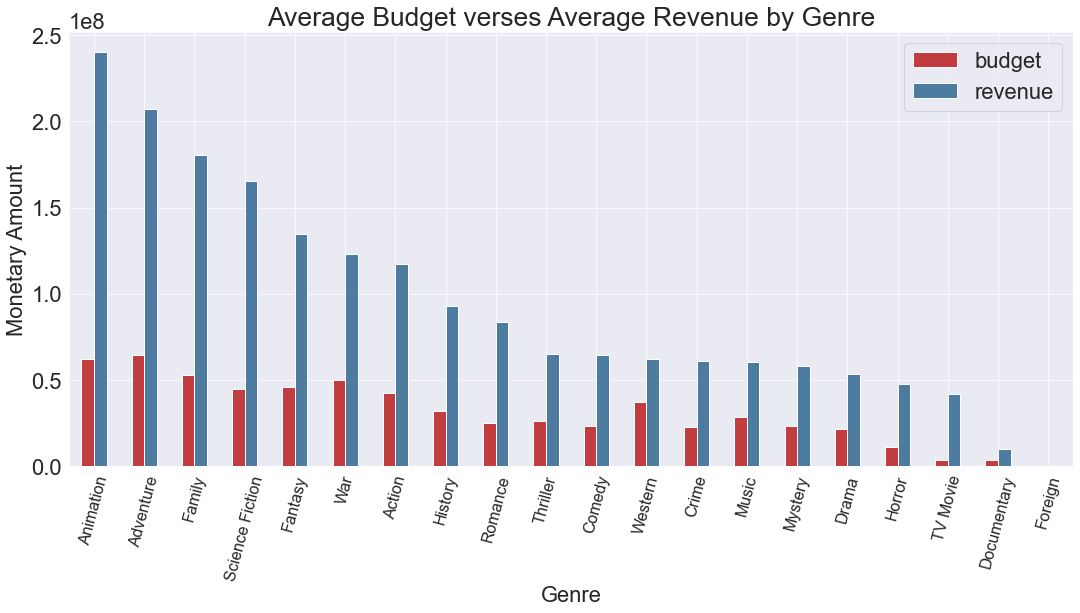

In [79]:
#create figure and axis
f,ax=plt.subplots(figsize=(18, 8))

# calculate and plot average budget and revenue by genre
df_movie[['genres', 'budget', 'revenue']].groupby(['genres']).mean().sort_values(["revenue","budget"], ascending=False).plot(kind="bar",  ax=ax);
ax.set(xlabel = 'Genre', ylabel = 'Monetary Amount', title = 'Average Budget verses Average Revenue by Genre')
plt.xticks(rotation=75,fontsize=16)

**Observations**

Animation as a genre has the highest revenue, followed by the genre Adventure - but it's budget is slightly higher. At the opposite end of the spectrum foreign movies, documentaries and TV Movies bring in the least revenue.


In [80]:
# Create new dataframe to work on RoI
df_movie_roi = df_movie[['genres', 'revenue', 'budget', 'popularity', 'vote_average']].groupby(['genres']).mean()
df_movie_roi.head(2)

,revenue,budget,popularity,vote_average
genres,,,,
Action,1.170983e+08,4.231958e+07,0.838266,5.751009
Adventure,2.071020e+08,6.477152e+07,1.219834,6.049744


In [81]:
# calculate RoI and add to dataframe
df_movie_roi['RoI'] = df_movie_roi['revenue'] / df_movie_roi['budget']
df_movie_roi.head(2)

,revenue,budget,popularity,vote_average,RoI
genres,,,,,
Action,1.170983e+08,4.231958e+07,0.838266,5.751009,2.767000
Adventure,2.071020e+08,6.477152e+07,1.219834,6.049744,3.197424


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

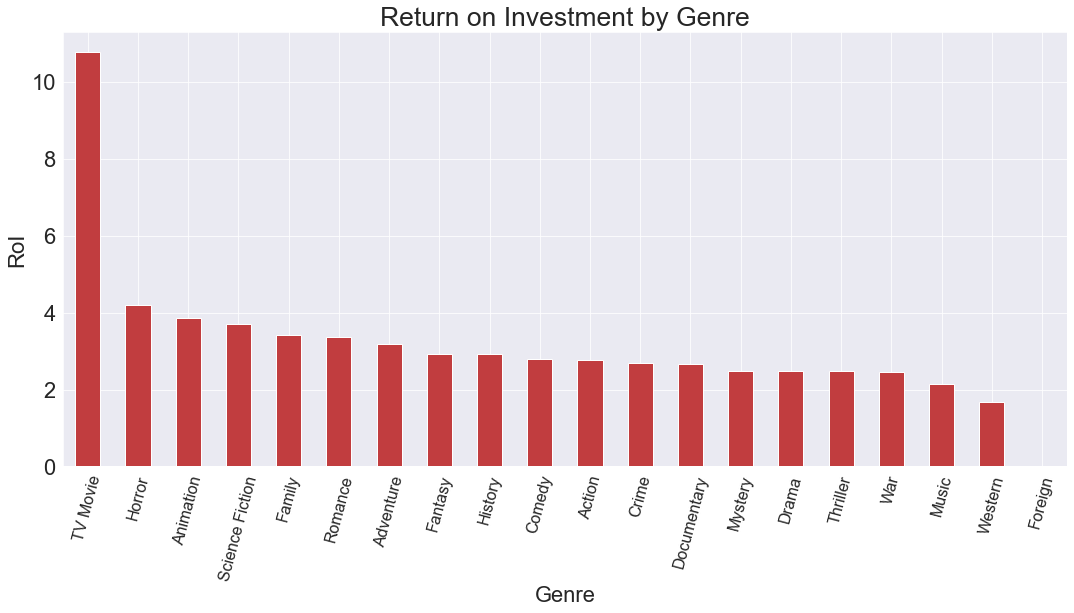

In [82]:
#create figure object and axis
f,ax=plt.subplots(figsize=(18, 8))

# RoI of each genres' movies
df_movie_roi['RoI'].sort_values(ascending=False).plot(kind="bar",  ax=ax);

ax.set(xlabel = 'Genre', ylabel = 'RoI', title = 'Return on Investment by Genre')
plt.xticks(rotation=75,fontsize=16)

**Observations**

TV Movies takes the number 1 spot for RoI. This makes sense as it has comparable revenue to other genres, but it's budget is tiny in comparison.

**Question 2.3: Which genres are the most popular?**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

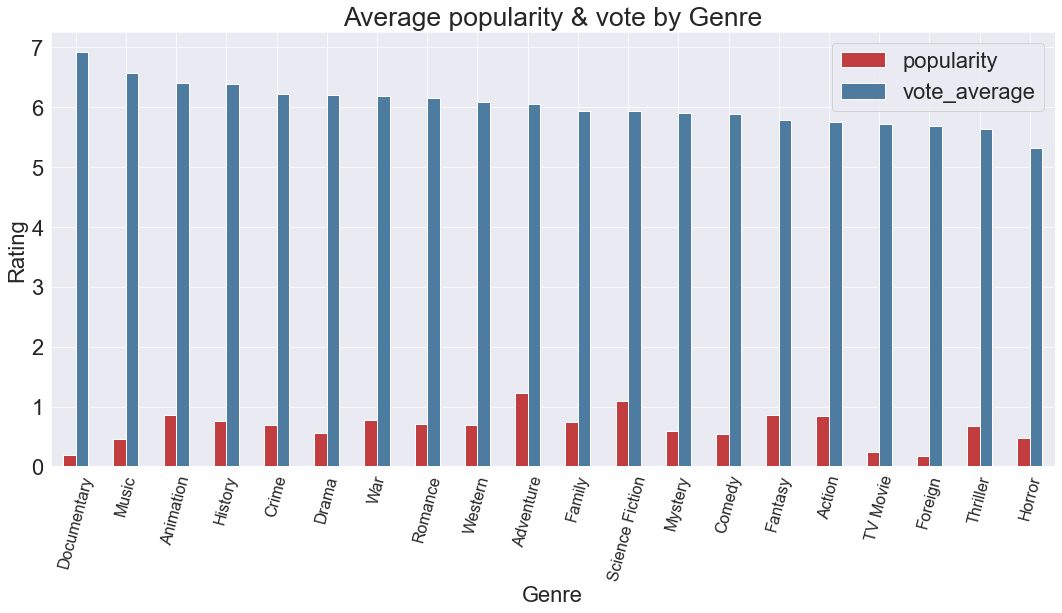

In [84]:
#create figure object and axis
f,ax=plt.subplots(figsize=(18, 8))


# Avergae popularity by genre
df_movie[['genres', 'popularity', 'vote_average']].groupby(['genres']).mean().sort_values(["vote_average"], ascending=False).plot(kind="bar",  ax=ax);

ax.set(xlabel = 'Genre', ylabel = 'Rating', title = 'Average popularity & vote by Genre')
plt.xticks(rotation=75,fontsize=16)

**Observations**

Documentaries are consistantly highly rated, but have a very low popularity score indicating that while they are not frequently watched, they are intensly enjoyed by those who do. 

**Question 3: Which Directors are the most successful (Revenue/Rating)?**


In [85]:
#Create new dataframe
df_director_movies = df_movie

#split out the director field 
df_director_movies['director'] = df_director_movies['director'].apply(lambda x: x.split("|")[0])

In [86]:
#Create new dataframe with the sum of revenue for directors by year
df_director_revenue = df_director_movies.groupby(['director', 'release_year']).sum()['revenue']#.nlargest(10)
df_director_revenue = pd.DataFrame(df_director_revenue)
df_director_revenue.head(10)

,,revenue
director,release_year,
FrÃ©dÃ©ric Jardin,2011,3358.0
A.R. Murugadoss,2008,76000000.0
Aaron Aites,2008,0.0
Aaron Blaise,2003,250.0
Aaron Hann,2015,0.0
Aaron Harvey,2011,0.0
Aaron Katz,2014,0.0
Aaron Keeling,2015,0.0
Aaron Moorhead,2015,49970.0


In [87]:
#Create new data frame for the total sumation of revenue for directors
df_director_revenue_total = df_director_revenue.groupby(['director']).sum()
df_director_revenue_total = pd.DataFrame(df_director_revenue_total)
df_director_revenue_total = df_director_revenue_total.sort_values(by = ['revenue'], ascending = False)
df_director_revenue_total.head(10)

,revenue
director,
Steven Spielberg,9.018564e+09
Peter Jackson,6.523245e+09
James Cameron,5.841895e+09
Michael Bay,4.917208e+09
Christopher Nolan,4.167549e+09
David Yates,4.154296e+09
Robert Zemeckis,3.869691e+09
Chris Columbus,3.851492e+09
Tim Burton,3.782610e+09


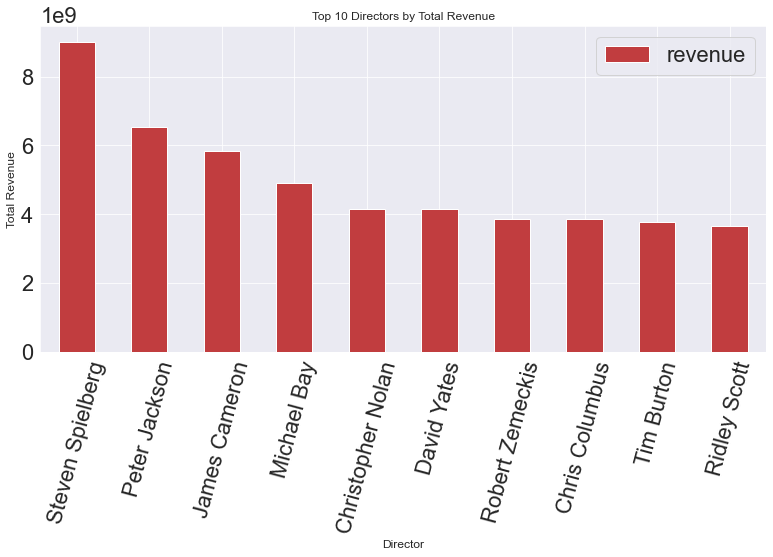

In [88]:
#plot a bar graph
df_director_revenue_total[:10].plot(kind = 'bar', figsize=(13,6))

#setup the title and the labels 
plt.title("Top 10 Directors by Total Revenue",fontsize=12)
plt.xticks(rotation=75)
plt.xlabel("Director",fontsize= 12)
plt.ylabel("Total Revenue",fontsize= 12)
sns.set_style("whitegrid")

**Observations**

However, this skews our data toward those directors who have released more movies over their career. An apples-to-apple comparison could use the mean revenue of each film.

In [89]:
#Create new data frame for the mean of revenue for directors
df_director_revenue_mean = df_director_revenue.groupby(['director']).mean()
df_director_revenue_mean = pd.DataFrame(df_director_revenue_mean)
df_director_revenue_mean = df_director_revenue_mean.sort_values(by = ['revenue'], ascending = False)

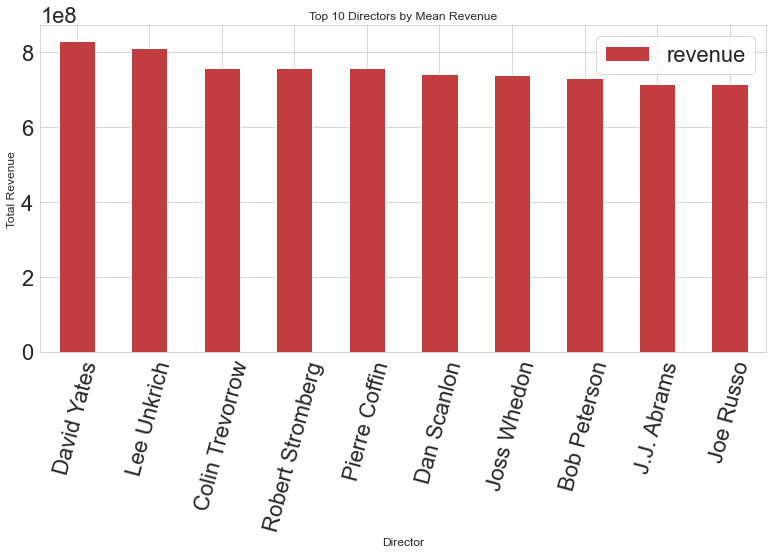

In [90]:
#plot a bar graph
df_director_revenue_mean[:10].plot(kind = 'bar', figsize=(13,6))

#setup the title and the labels 
plt.title("Top 10 Directors by Mean Revenue",fontsize=12)
plt.xticks(rotation=75)
plt.xlabel("Director",fontsize= 12)
plt.ylabel("Total Revenue",fontsize= 12)
sns.set_style("whitegrid")

**Observations**

David Yates is the most succesfull in terms of average revenue.

**Question 4: Which attributes indicate a movie's chances of success (Revenue/Rating)?**

C:\Users\noama\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\noama\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\noama\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\noama\anaconda3\lib\site-packages\pandas\plotting\_matpl

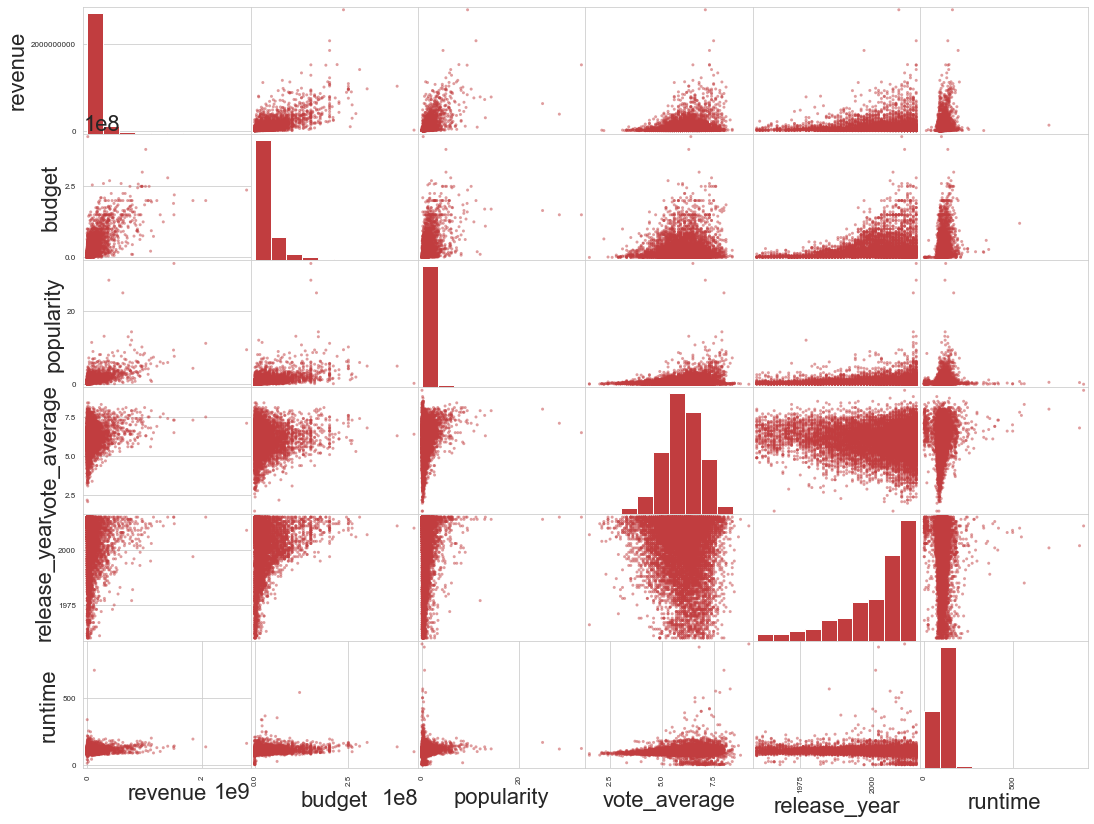

In [91]:
#subset data for columns of interest
aux_df = df_movie[['revenue', 'budget', 'popularity', 'vote_average', 'release_year', 'runtime']]

#create scatter matrix
pd.plotting.scatter_matrix(aux_df, figsize=(18,14));

**Observations**

There is a positive correlation between budget and revenue, and a slightly positive correlation with release year and budget. With average rating only slightly positive influenced by budget.

<a id='conclusions'></a>

## Conclusion

**Question 1: How has the success of genres changed over time (Revenue/Rating)?**

>Drama, comedy and action were the 3 top most frequent type of movies. The popularity of movie releases has generally grown over time. Heatmaps confirmed these trends. 

**Question 2: How succesful are different genres (Revenue/Rating)?**

>The success of genres was first analysed by evaluating revenues. The genre animation is the largest earner, followed by adventure. At the other end of the spectrum it appears foreign movies, documentaries and TV Movies rank at the bottom in terms of revenue. If return on investment (RoI) is calculated however, TV Movies moved to the top of the RoI ranking,meaning it earned the most per budget spent.

**Question 3: Which Directors are the most successful (Revenue/Rating)?**

>By looking at the total revenue generated by directors, Stevn Spielberg appeared to be the most succesfull director, followed by Peter Jackson. However, this favours directors with long careers, and thus more the opportunity to create more movies. To account for this, the average revenue per movie wwas calculted, resulting in David Yates being the most successful director.

**Question 4: Which attributes indicate a movie's chances of success (Revenue/Rating)?**

>We skimmed the surface of what attributes helped define a movies chance of success. We can tentatively say there appears to be a positive correlation between budget and revenue. This would confirm the intuition that higher budgets are indeed likely to result in higher revenues. 

**Limitations and Assumptions**

>Original budget and revenue figures used, ignoring figures adjusted for inflation.

>Voter average can be skewed by the total number of votes for each category.

>Director analysis based on the sum of revenue. We could also have looked at our definition of success and incorporated average rating for each director.
